In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from tqdm import tqdm

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [8, 8]

# 1) Theory

We have to initialize the Plummer sphere at equilibrium.

## 1.1) Positions

For the sampling of $r$, $\phi$ and $\theta$, we can apply the direct Monte Carlo sampling method.\
$\phi$ and $\theta$ are distributed uniformly on the surface of a sphere, so we sample $P \in [0,1]$ and then substitute it in:

$$p(\phi) = \dfrac{1}{2\pi} \:\: \Longrightarrow \:\: P(\phi) \, = \, \int^{\phi}_{0} p(\phi')d\phi' \, = \, \int^{\phi}_{0} \dfrac{1}{2\pi}d\phi' \, = \, \dfrac{\phi}{2\pi} \:\: \Longrightarrow \:\: \color{lime} \large \phi(P) = 2\pi P$$

$$p(\theta) = \dfrac{\sin{\theta}}{2} \:\: \Longrightarrow \:\: P(\theta) \, = \, \int^{\theta}_{0} p(\theta')d\theta' \, = \, \int^{\theta}_{0} \dfrac{\sin{\theta'}}{2}d\theta' \, = \, \dfrac{1-\cos{\theta}}{2} \:\: \Longrightarrow \:\: \color{lime} \large \theta(P) = \arccos(1-2P)$$

The sampling of the radial positions according to the Plummer model is more tricky.

- We know that:
  $$\rho(r) \, = \, \dfrac{3M_{tot}}{4\pi b^3} \left(1+\dfrac{r^2}{b^2}\right)^{-5/2} \:\: , \:\: M(r) \, = \, \dfrac{r^3}{(b^2+r^2)^{3/2}}M_{tot}$$ 
  where $b$ is a scale factor.
</br></br>
- Therefore, the radial *pdf* $p(r)$ is given by:
  $$p(r) \, = \, \dfrac{4\pi r^2 \rho(r)}{M_{tot}} \, = \, \dfrac{3r^2}{b^3} \left(1+\dfrac{r^2}{b^2}\right)^{-5/2}$$
</br></br>
- We can integrate it over $r$ (thanks `Mathematica`) to obtain the *cdf* $P(r)$:
  $$P(r) \, = \, \int^{r}_{0} \rho(r')dr' \, = \, \dfrac{r^3}{(b^2+r^2)^{3/2}} \, = \, \dfrac{M(r)}{M_{tot}} \in [0,1]$$
</br></br>
- This relation can be easily inverted:
  $$P^{2/3} \, = \, \dfrac{r^2}{b^2+r^2} \:\: \Longrightarrow \:\: P^{-2/3} \, = \, \dfrac{b^2}{r^2}+1 \:\: \Longrightarrow \:\: \color{lime} \large r(P) \, = \, \dfrac{b}{\sqrt{P^{-2/3}-1}}$$

## 1.2) Velocities

The orientations can be sampled just like $\phi$ and $\theta$, but the magnitudes require more work.

- The distribution of the velocity magnitudes is given by:
  $$F(v) \, = \, \int^{v}_0 f(\epsilon)v'^2dv' \, = \, \int^{v}_0 \left(\psi - \dfrac{v'^2}{2}\right)^{7/2}v'^2dv' \:\:\: , \, \textnormal{where} \:\:\: \color{lime} \large \psi(r) \, = \, -\phi_{G}(r) \, = \, \dfrac{GM_{tot}}{\sqrt{b^2+r^2}}$$
  where the maximum allowed velocity is $v_{escape}(r)=\sqrt{2\psi (r)}$, since for our system to be at equilibrium it is necessary that it is bound.\
  Once the position is known, $\psi(r)$ is straightforward to evaluate, but computing the integral and inverting the solution is very hard.\
  For this reason, the direct-Montecarlo sampling method is not an option and we have to resort to the acceptance-rejection sampling method.
</br></br>
- Let's substitute $q \doteq \dfrac{v}{v_{escape}} = \dfrac{v}{\sqrt{2\psi}} \in [0,1]$, which does not depend on $r$.
  $$F(q) \, = \, \int^{q}_0 \left(\psi-\psi q'^2\right)^{7/2} 2\psi q'^2\sqrt{2\psi}dq' \, = \, 2\sqrt{2}\int^{q}_0 \psi^5(1-q'^2)^{7/2}q'^2dq'$$
</br></br>
- $\psi$ only depends on $r$, while $q$ does not depend on $r$. Therefore, we can take $\psi$ out of the integral.
  $$\color{lime} \large F(q) \, = \, C_{normalization} \int^{q}_0 (1-q'^2)^{7/2}q'^2dq'$$
  Once we have sampled $q$, it is straightforward to convert it back to $v=q\sqrt{2\psi}$.

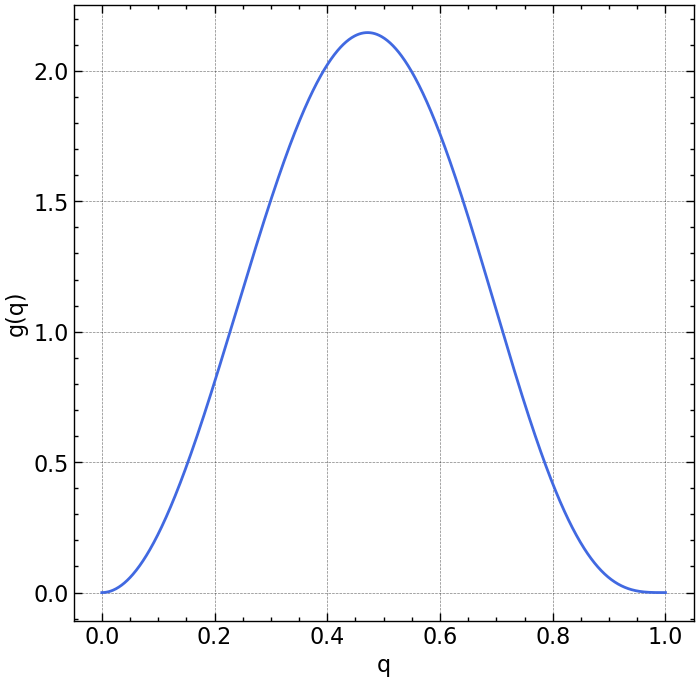

In [2]:
def g_of_q(x):
    return (x**2)*(1-x**2)**(7/2)

C_normalization = scipy.integrate.quad(g_of_q, 0, 1)[0]

x_dense = np.linspace(0, 1, 1000)
plt.plot(x_dense, g_of_q(x_dense)/C_normalization, color='royalblue')
plt.xlabel('q')
plt.ylabel('g(q)');

# 2) Code

## 2.1) Positions

## 2.2) Velocities